In [1]:
# event_filter = web3.eth.filter({"address": contract_address})
from web3 import Web3
from quickblocks import QuickBlocks
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import math
from typing import Dict, Tuple, List, Set, Tuple
from tqdm import tqdm_notebook as tqdm
from utils import *
provider = Web3.IPCProvider('/home/mike/.local/share/io.parity.ethereum/jsonrpc-etc-a.ipc')
w3 = Web3(provider)

In [2]:
w3.eth.getBlock(5000002)['transactions']
#w3.eth.getTransaction()

[HexBytes('0x95cc0176d56b2926e6368042d11f233201e0418d5ac2511aabf12934f8828456'),
 HexBytes('0x26c9e6fdbf5ac23f2585607988ee249d9294f112512d408a116bb310530de818'),
 HexBytes('0x63990f8bc23d15f5dfc1c32a30df936c7bff57a77647324eb97b7e3b32cdd18f'),
 HexBytes('0x5f21db776dfed460394758b8155433102660780fa1e10d8342fadb2d65563e05'),
 HexBytes('0x191988dfed1522d20d7a6c08cd5821990f253b3d1ed59252da66cf68d146f30b'),
 HexBytes('0x3ee95d02b4d213f286c6e6f17ca8f84817404f08a66177b158138b7bea81b100'),
 HexBytes('0x94073c7f9c63db4d507d9e75e330ae33eb5ad61664827f15eaedab991a1626f2'),
 HexBytes('0x471a3737d1f2e973efdb5e19b89e002c5867537b1d7bc89325b65ad7ac3f9ecf'),
 HexBytes('0xb0ff915318e9f9a980c672a44d00470ace941e26288f4b91061be088868cc0ad'),
 HexBytes('0xf2dce36b1bb02117e3f280ae92c4cef787febfed97cd87f5fae11eabbb44d583')]

In [10]:
for b in range(5000000, 6000000):
    total = 0
    logs = 0
    for i in w3.eth.getBlock(b)['transactions']:
        r = w3.eth.getTransactionReceipt(i)
        if len(r['logs'])>0:
            logs += 1
        total += 1
    if total >0 and logs/total > 0.3 and logs/total < 0.8:
        print(b)
        break

5000000


In [23]:
for tx in w3.eth.getBlock(5000034)['transactions']:
    # print(w3.eth.getTransaction(tx))
    print(w3.eth.getTransactionReceipt(tx)['gasUsed'])
    print()

36163

36163

21000

21000

36163

36163

36163

334545

21000

21000

21000

21000

21000



In [13]:
from web3.parity import Parity
p = Parity(w3)
p.traceBlock(5000034)[0]

{'action': {'callType': 'call',
  'from': '0x0e68b9b678729ac8a7e115bbd776fd0882fced83',
  'gas': '0x1b5cb',
  'input': '0x0f2c9329000000000000000000000000fbb1b73c4f0bda4f67dca266ce6ef42f520fbb98000000000000000000000000e592b0d8baa2cb677034389b76a71b0d1823e0d1',
  'to': '0xe94b04a0fed112f3664e45adb2b8915693dd5ff3',
  'value': '0xde5bf178b2df000'},
 'blockHash': '0xbcb25775bc718890693731d101e402ae208b90fc654f580c82cf4df3df7b1958',
 'blockNumber': 5000034,
 'result': {'gasUsed': '0x2f2b',
  'output': '0x0000000000000000000000000000000000000000000000000000000000000001'},
 'subtraces': 3,
 'traceAddress': [],
 'transactionHash': '0x779d1ad980f1a3f125b1e2cf2c989667e8ce3d580d6566050bbbafa0b61c03cf',
 'transactionPosition': 0,
 'type': 'call'}

In [47]:
w3.eth.getTransactionReceipt('0x26c9e6fdbf5ac23f2585607988ee249d9294f112512d408a116bb310530de818')

AttributeDict({'blockHash': HexBytes('0x2905affcbc9fc70d6c1f6937be90786d34b299f5d2bc40e4080ce1c50a87403a'),
 'blockNumber': 5000002,
 'contractAddress': None,
 'cumulativeGasUsed': 42000,
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'root': '0xd4d16cb32826e6d2fdb1857965b8d3fc32d744219171e4ea1555c0528ed5e897',
 'status': None,
 'transactionHash': HexBytes('0x26c9e6fdbf5ac23f2585607988ee249d9294f112512d408a116bb310530de818'),
 'transactionIndex': 1})

In [34]:
for i in range(5000000, 6000000):
    b = w3.eth.getBlock(i)
    if len(b['transactions']) > 0:
        print(i)
        print(b)
        break

5000000
AttributeDict({'author': '0xdf7d7e053933b5cc24372f878c90e62dadad5d42', 'difficulty': 153555857798073, 'extraData': HexBytes('0x4554432065746865726d696e65202d20555331'), 'gasLimit': 4700036, 'gasUsed': 51416, 'hash': HexBytes('0xb2f55d12af971452c3669669380e03040ff01fabb64afec6bfddb3052dbd0117'), 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000080000000000000000020000000000000000000000000000000000000000000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000008000000000000000'), 'miner': '0xDf7D7e053933b5cC24372f878c90E62dADAD5d42', 'mixHash': HexBytes('0x36a33662da9d77511a4580dceb57f46b261247134ffd126398c2fcbff34acae9'), 'nonce': 

In [17]:
w3.toHex(b.'number')

SyntaxError: invalid syntax (<ipython-input-17-9c7f4541d7d7>, line 1)

In [3]:
w3.eth.getUncleByBlock(5000004, 0)

AttributeDict({'author': '0x009eba94207f1a59b4ba514a96ed5e0b3babc8a6',
 'difficulty': '0x8ba8925b73b9',
 'extraData': '0xd5830109008650617269747986312e32312e30826c69',
 'gasLimit': '0x47b784',
 'gasUsed': '0x100878',
 'hash': '0x939f981ab0508aa21331fa1d977b3047e726d573d3c265b1a380d81e234d0f0d',
 'logsBloom': '0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000080000000000000000020000000000000000000000000000000000000000000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000008000000000000000',
 'miner': '0x009eba94207f1a59b4ba514a96ed5e0b3babc8a6',
 'mixHash': '0xaf1dbb4e2a31f6759024f86ceb68b15bdc20d6a58258a055999da6f1b69f4c99',
 'nonce': '0x21571b900db3a194',
 '

In [24]:
w3.toInt(hexstr=w3.eth.getUncleByBlock(5000004, 0)['number'])

SyntaxError: unexpected EOF while parsing (<ipython-input-24-b3ad32e46191>, line 1)

In [28]:
w3.toInt(hexstr=w3.eth.getUncleByBlock('0x939f981ab0508aa21331fa1d977b3047e726d573d3c265b1a380d81e234d0f0d')['number'])

TypeError: getUncleByBlock() missing 1 required positional argument: 'uncle_index'

In [8]:
w3.eth.getBlock(5000004)

AttributeDict({'author': '0xdf7d7e053933b5cc24372f878c90e62dadad5d42',
 'difficulty': 153556894798128,
 'extraData': HexBytes('0x4554432065746865726d696e65202d20455532'),
 'gasLimit': 4700036,
 'gasUsed': 73253,
 'hash': HexBytes('0x00d04a648e0747c56e6c7d888e088b448a4bbb9869a645b8fd627dd497a3fc55'),
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000080000080000000000000000000000000000000000000000000000000000000000000000000000000004000000002000000000000000000000000000100000000000000000000000000000000000800800000000000000000000000000000400000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000400000000000000000000000000000000'),
 'miner': '0xDf7D7e053933b5cC24372f878c90E62dADAD5d42',
 'mixHash': HexBytes('0x2480e8d4477666fea68becabdaf0c0038b8b9fd0ff1ab8fb47e7445ae57b2eee'),
 'nonce':

In [29]:
qb[5800002]['miner']

'0xea674fdde714fd979de3edf0f56aa9716b898ec8'

In [117]:
w3.eth.getTransaction('0x5188f5d794ec38fce31f85c37e1d83dcfbd2a68e147fa3a9da1747b23c1ad8bd')

AttributeDict({'blockHash': HexBytes('0x14962186070395723c2201d1ab0e9685cf84554fdd9e7e50a04c4feb2c627a03'),
 'blockNumber': 5900000,
 'chainId': '0x1',
 'condition': None,
 'creates': None,
 'from': '0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5',
 'gas': 50000,
 'gasPrice': 1000000000,
 'hash': HexBytes('0x5188f5d794ec38fce31f85c37e1d83dcfbd2a68e147fa3a9da1747b23c1ad8bd'),
 'input': '0x',
 'nonce': 8044318,
 'publicKey': HexBytes('0x957027fd3b1695f5e5f44a540836df36b6e17da3a216b20d836f3ecab59353e7147d9269be6cd5049b02d82c54e4246d853bf7b246645cceb23b8ec2219a2655'),
 'r': HexBytes('0x594c4ebfccfadaffc922355289c05d8bfbf6b8630fb80c2b27bb8a6324719f21'),
 'raw': HexBytes('0xf86e837abf1e843b9aca0082c350942693fdf73c95f1f906b49d687b25ec2dc0a604998801645a0fcf7741308026a0594c4ebfccfadaffc922355289c05d8bfbf6b8630fb80c2b27bb8a6324719f21a04e4e5b6caa50fd247f05b668ce1b8013ff7bf207ac0ec30f70328065f5683ab0'),
 's': HexBytes('0x4e4e5b6caa50fd247f05b668ce1b8013ff7bf207ac0ec30f70328065f5683ab0'),
 'standardV':

In [111]:
t = w3.eth.getTransaction('0x5c504ed432cb51138bcf09aa5e8a410dd4a1e204ef84bfed1be16dfba1b22060')

In [136]:
for tx in block['transactions']:
    r = w3.eth.getTransactionReceipt(tx)
    if len(r['logs']) > 0:
        print(dict(r))
        print()
        print(r['logs'][0])
        print()
        print(dict(r['logs'][0]).keys())
        break

{'blockHash': HexBytes('0x14962186070395723c2201d1ab0e9685cf84554fdd9e7e50a04c4feb2c627a03'), 'blockNumber': 5900000, 'contractAddress': None, 'cumulativeGasUsed': 228563, 'gasUsed': 39512, 'logs': [AttributeDict({'address': '0x209c4784AB1E8183Cf58cA33cb740efbF3FC18EF', 'blockHash': HexBytes('0x14962186070395723c2201d1ab0e9685cf84554fdd9e7e50a04c4feb2c627a03'), 'blockNumber': 5900000, 'data': '0x00000000000000000000000032be343b94f860124dc4fee278fdcbd38c102d88', 'logIndex': 0, 'topics': [HexBytes('0x23919512b2162ddc59b67a65e3b03c419d4105366f7d4a632f5d3c3bee9b1cff')], 'transactionHash': HexBytes('0x7118eddfbf398987b7fa37cb7ec56d62592f5a4e246fe145741624a0173ee2cf'), 'transactionIndex': 9, 'transactionLogIndex': '0x0', 'type': 'mined'}), AttributeDict({'address': '0x4eB9f172B27B771a81dE21f4e93Bac2A08cE3a8d', 'blockHash': HexBytes('0x14962186070395723c2201d1ab0e9685cf84554fdd9e7e50a04c4feb2c627a03'), 'blockNumber': 5900000, 'data': '0x000000000000000000000000209c4784ab1e8183cf58ca33cb740efb

In [90]:
set(block.keys())-set(['nonce', 'mixHash', 'parentHash', 'sealFields', 'sha3Uncles', 'uncles'])-set(['extraData', 'hash', 'logsBloom', 'receiptsRoot', 'stateRoot', 'transactionsRoot'])

{'author',
 'difficulty',
 'gasLimit',
 'gasUsed',
 'miner',
 'number',
 'size',
 'timestamp',
 'totalDifficulty',
 'transactions'}

In [91]:
type({2,3,4})

set

In [22]:
stop = False
for i in range(2500000, 3000000):
    for tx in qb[i]['transactions']:
        if tx['input'] != '0x':
            print(tx)
            print(Web3.toInt(hexstr = tx['input']))
            stop = True
            break
    if stop:
        break

{'hash': '0x72d702c0332db5e1a51a1639c466aafc6e9b36e74c2c699bdcb0e1a44d23c51e', 'blockHash': '0x5038ffc0d84d496fb6669ab0e60df559fa39dbf181f278d508086a82fc72761f', 'blockNumber': 2500001, 'transactionIndex': 0, 'nonce': 2, 'timestamp': 1477324794, 'from': '0xc432a98bb9df5476cfe725d89901a5956c43a653', 'to': '0xfa52274dd61e1643d2205169732f29114bc240b3', 'value': 285999040829000000000, 'gas': 35000, 'gasPrice': 31000000000, 'input': '0xf7654176', 'receipt': {'contractAddress': '0x0', 'gasUsed': 30941, 'logs': [{'address': '0xfa52274dd61e1643d2205169732f29114bc240b3', 'data': '0x00000000000000000000000000000000000000000000000f8108b4589afc2200', 'logIndex': 0, 'topics': ['0x56b138798bd325f6cc79f626c4644aa2fd6703ecb0ab0fb168f883caed75bf32', '0x000000000000000000000000c432a98bb9df5476cfe725d89901a5956c43a653', '0x000000000000000000000000267be1c1d684f78cb4f6a176c4911b741e4ffdc0']}], 'status': None}, 'gasUsed': 30941}
4150608246


In [27]:
def basic_stats(balances, ether=False):
    if ether:
        _balances = [b/1e18 for b in balances]
    else:
        _balances = balances
    total_v = sum(_balances)
    mean_v = np.mean(_balances)
    median_v = np.median(_balances)
    max_v = max(_balances)
    min_v = min(_balances)
    return total_v, mean_v, median_v, max_v, min_v

In [28]:
basic_stats(genesis_balances, True)

(72009906.91648012, 8100.102015352081, 1492.112, 11901484.23948, 13.37)

In [33]:
basic_stats(genesis_balances_now, True)

(8588751.282857245, 966.1137551020531, 0.009935371360655, 560000.0, 0.0)

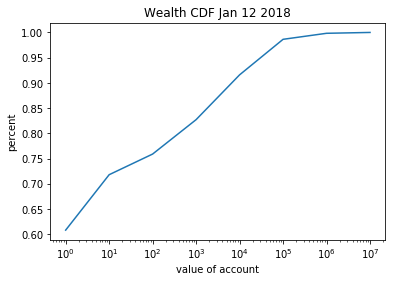

In [111]:
show_wealth_cdf(genesis_balances_now, 'Wealth CDF Jan 12 2018')

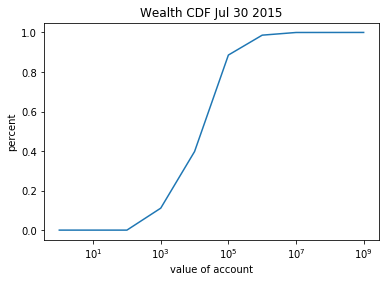

In [112]:
show_wealth_cdf(genesis_balances, 'Wealth CDF Jul 30 2015')

In [4]:
contract_addresses = {
    'IDEX': ['0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208'],
    'ForkDelta': ['0x8d12A197cB00D4747a1fe03395095ce2A5CC6819'],
    'Bancor': ['0xc6725aE749677f21E4d8f85F41cFB6DE49b9Db29'],
    'CryptoKitties': ['0xb1690c08e213a35ed9bab7b318de14420fb57d8c', '0xc7af99fe5513eb6710e6d5f44f9989da40f27f26', '0x06012c8cf97bead5deae237070f9587f8e7a266d'],
    '0xBitcoin': ['0xb6ed7644c69416d67b522e20bc294a9a9b405b31'],
    'PoWH3D': ['0xb3775fb83f7d12a36e0475abdd1fca35c091efbe'],
    'LocalEthereum': ['0x09678741bd50c3e74301f38fbd0136307099ae5d', '0x867ffb5a3871b500f65bdfafe0136f9667deae06'],
    'EnclavesDEX': ['0xbf45f4280cfbe7c2d2515a7d984b8c71c15e82b7', '0xed06d46ffb309128c4458a270c99c824dc127f5d'],
    'Kyber': ['0x964F35fAe36d75B1e72770e244F6595B68508CF5', '0x63825c174ab367968ec60f061753d3bbd36a0d8f']
    }

In [5]:
exchange_addresses = {
    'Binance': ['0x3f5CE5FBFe3E9af3971dD833D26bA9b5C936f0bE'],
    'Kraken': ['0x2910543Af39abA0Cd09dBb2D50200b3E800A63D2',
               '0xE853c56864A2ebe4576a807D26Fdc4A0adA51919',
               '0x0A869d79a7052C7f1b55a8EbAbbEa3420F0D1E13',
               '0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0'],
    'Bitfinex': ['0x1151314c646Ce4E0eFD76d1aF4760aE66a9Fe30F',
                 '0x7727E5113D1d161373623e5f49FD568B4F543a9E',
                 '0x4fdd5Eb2FB260149A3903859043e962Ab89D8ED4',
                 '0x876EabF441B2EE5B5b0554Fd502a8E0600950cFa'],
    'EOS': ['0x9937Dbb2128B55c44D8af7bF36FD76796A814Cf4'],
    'Bittrex': ['0xFBb1b73C4f0BDa4f67dcA266ce6Ef42f520fBB98'],
}

In [6]:
sample_block_num = 5000000
sample_address = Web3.toChecksumAddress(contract_addresses['IDEX'][0])

In [7]:
# latest block
LATEST_BLOCK = w3.eth.blockNumber
LATEST_BLOCK

5149644

In [8]:
w3.eth.gasPrice

5000000000

In [9]:
w3.eth.getBalance(sample_address, w3.eth.blockNumber)

43291498373710993865419

In [6]:
# looking at a block
w3.eth.getBlock(LATEST_BLOCK)

AttributeDict({'author': '0xea674fdde714fd979de3edf0f56aa9716b898ec8',
 'difficulty': 3006307041308405,
 'extraData': HexBytes('0x65746865726d696e652d65753132'),
 'gasLimit': 8000029,
 'gasUsed': 7904283,
 'hash': HexBytes('0xc474b3d1bc0f59b294c115afd3e8170e3f1e153cf38c0161a3b20bd83a61d008'),
 'logsBloom': HexBytes('0x0440004044708010801100882440048248040c80084041c256800c80f020c10880ae80462c608a004811010cf280470042828209044080418430012000000008040108410342b8ad08a0400883048880454810900409020204001504232110a20412382202243480c004010120422805040002000a04403024c900314523202094305c20a504000111901a01e08188161040104850c0844450800024c02612418008005000604090804032820a0dc0080006060886c0c10002600850810040520003058e000000000011110028800040000020a5819980002d2012701222a5414832081140040441040201840400880040240200c040430000125a0102800008'),
 'miner': '0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8',
 'mixHash': HexBytes('0xe602c3e9f0a350af04a345c7419827006c1324c45bd429871b71906aa90fb64b'),
 'nonce': HexByt

In [11]:
# looking at a block
block = get_block(LATEST_BLOCK)
assert block is not None
print(block)

{'gasLimit': 7999992, 'gasUsed': 7983855, 'hash': '0xf1eff66c4473672e050b5cd40eb89400c01ac24a3423f7926d24999645ee274c', 'blockNumber': 5778846, 'parentHash': '0xfd03b3f55c3ca849a8a1c9a18f046798792a2d2b6f2a122f2dc0393be76e4619', 'miner': '0xb2930b35844a230f00e51431acae96fe543a0347', 'difficulty': 3354344397692623, 'price': 0, 'finalized': 0, 'timestamp': 1528850552, 'transactions': [{'hash': '0x6c94bcceba740ae9bc01ddecca8e65c1b7906fe06c35bda3ec0004ceeaefb81d', 'blockHash': '0xf1eff66c4473672e050b5cd40eb89400c01ac24a3423f7926d24999645ee274c', 'blockNumber': 5778846, 'transactionIndex': 0, 'nonce': 179, 'timestamp': 1528850552, 'from': '0x0662596A2a8F7FE81E13F5b68F77E851A1251f73', 'to': '0x1a94fce7ef36Bc90959E206bA569a12AFBC91ca1', 'value': 0, 'gas': 500000, 'gasPrice': 3000000000, 'input': '0x88c2a0bf00000000000000000000000000000000000000000000000000000000000005c9', 'receipt': {'contractAddress': '0x0', 'gasUsed': 295304, 'logs': [{'address': '0x1a94fce7ef36bc90959e206ba569a12afbc91ca1',

In [12]:
block['transactions']

[{'hash': '0x6c94bcceba740ae9bc01ddecca8e65c1b7906fe06c35bda3ec0004ceeaefb81d',
  'blockHash': '0xf1eff66c4473672e050b5cd40eb89400c01ac24a3423f7926d24999645ee274c',
  'blockNumber': 5778846,
  'transactionIndex': 0,
  'nonce': 179,
  'timestamp': 1528850552,
  'from': '0x0662596A2a8F7FE81E13F5b68F77E851A1251f73',
  'to': '0x1a94fce7ef36Bc90959E206bA569a12AFBC91ca1',
  'value': 0,
  'gas': 500000,
  'gasPrice': 3000000000,
  'input': '0x88c2a0bf00000000000000000000000000000000000000000000000000000000000005c9',
  'receipt': {'contractAddress': '0x0',
   'gasUsed': 295304,
   'logs': [{'address': '0x1a94fce7ef36bc90959e206ba569a12afbc91ca1',
     'data': '0x0000000000000000000000000662596a2a8f7fe81e13f5b68f77e851a1251f73000000000000000000000000000000000000000000000000000000000000062600000000000000000000000000000000000000000000000000000000000005c9000000000000000000000000000000000000000000000000000000000000060cf161076cd10e5844a16223020080006410006214c66000000015036400cc4039',
     'logIndex

In [13]:
# looking at trasaction within a block
w3.eth.getTransactionFromBlock(sample_block_num, 0)

AttributeDict({'blockHash': HexBytes('0x7d5a4369273c723454ac137f48a4f142b097aa2779464e6505f1b1c5e37b5382'),
 'blockNumber': 5000000,
 'chainId': '0x1',
 'condition': None,
 'creates': None,
 'from': '0xd6cB6744B7f2Da784c5aFd6B023D957188522198',
 'gas': 121000,
 'gasPrice': 134000000000,
 'hash': HexBytes('0x569c5b35f203ca6db6e2cec44bceba756fad513384e2bd79c06a8c0181273379'),
 'input': '0x',
 'nonce': 4079,
 'publicKey': HexBytes('0x10006620789f12ef47d5efe964fa5dab2ad5bc69ff43b6ce94ba4360f2072ed5720ca6e14741f1e63267c6b38b7fe521e10d252cfcfab4220b4e02870a27a7fd'),
 'r': HexBytes('0x5df5034c46551b630553201581bd690e021c13b3134f37d14eb19ea971292a39'),
 'raw': HexBytes('0xf86f820fef851f3305bc008301d8a89488a690553913a795c3c668275297635b903a29e5882c250d42400204008025a05df5034c46551b630553201581bd690e021c13b3134f37d14eb19ea971292a39a04f263a9ef7b6e6d18d1b6c120f051e51aa737e12aabcf9466377779eb60656a9'),
 's': HexBytes('0x4f263a9ef7b6e6d18d1b6c120f051e51aa737e12aabcf9466377779eb60656a9'),
 'standardV

In [14]:
# get the receipt
h = w3.eth.getTransactionFromBlock(sample_block_num, 0).hash
w3.eth.getTransactionReceipt(h)

AttributeDict({'blockHash': HexBytes('0x7d5a4369273c723454ac137f48a4f142b097aa2779464e6505f1b1c5e37b5382'),
 'blockNumber': 5000000,
 'contractAddress': None,
 'cumulativeGasUsed': 21000,
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'root': None,
 'status': 1,
 'transactionHash': HexBytes('0x569c5b35f203ca6db6e2cec44bceba756fad513384e2bd79c06a8c0181273379'),
 'transactionIndex': 0})

In [15]:
def get_unique_accounts(startBlock, endBlock) -> Set[str]:
    n_transactions = 0
    accounts = set()
    for i in tqdm(range(startBlock, endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            n_transactions += 1
            if transaction['from']:
                accounts.add(transaction['from'])
            if transaction['to']:
                accounts.add(transaction['to'])
    return accounts, n_transactions

In [16]:
def get_n_unique_accounts(startBlock, n) -> Set[str]:
    n_transactions = 0
    accounts = set()
    i = startBlock
    while True:
        block = get_block(i)
        for transaction in block['transactions']:
            n_transactions += 1
            if transaction['from']:
                if len(accounts) == n:
                    return accounts, n_transactions
                else:
                    accounts.add(transaction['from'])
            if transaction['to']:
                if len(accounts) == n:
                    return accounts, n_transactions
                else:
                    accounts.add(transaction['to'])
        i += 1
    return accounts, n_transactions

In [17]:
# get accounts between start and end 
def get_accounts(startBlock, endBlock) -> List[str]:
    n_transactions = 0
    accounts = []
    for i in tqdm(range(startBlock, endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            n_transactions += 1
            if transaction['from']:
                accounts.append(transaction['from'])
            if transaction['to']:
                accounts.append(transaction['to'])
    return accounts, n_transactions

In [18]:
# get n accounts after start 
def get_n_accounts(startBlock, n) -> List[str]:
    n_transactions = 0
    accounts = []
    i = startBlock
    while True:
        block = get_block(i)
        for transaction in block['transactions']:
            n_transactions += 1
            if transaction['from']:
                if len(accounts) == n:
                    return accounts, n_transactions
                else:
                    accounts.append(transaction['from'])
            if transaction['to']:
                if len(accounts) == n:
                    return accounts, n_transactions
                else:
                    accounts.append(transaction['to'])
        i += 1
    return accounts, n_transactions

In [22]:
def avg_code_len(contracts) -> float:
    total = 0
    for contract in contracts:
        l = len(w3.eth.getCode(contract)) 
        assert l > 0
        total += l
    return total/len(contracts)

In [23]:
def get_accounts_history(accounts, startBlock, endBlock) -> Dict[str, List[Tuple[int, int]]]:
    accounts = set(accounts)
    accounts_history = {account: [] for account in accounts}
    for i in tqdm(range(startBlock, endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            if transaction['from'] in accounts_history:
                accounts_history[transaction['from']].append((i, -int(transaction['value'])))
            if transaction['to'] in accounts_history:
                accounts_history[transaction['to']].append((i, int(transaction['value'])))
    return accounts_history

In [24]:
# find the change in account value from start to end for a set of an accounts
def get_accounts_value_of_accounts(accounts, endBlock) -> Dict[str, int]:
    accounts = set(accounts)
    accounts_value = {account: 0 for account in accounts}
    for i in tqdm(range(endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            if transaction['from'] in accounts:
                accounts_value[transaction['from']] -= int(transaction['value'])
            if transaction['to'] in accounts:
                accounts_value[transaction['to']] += int(transaction['value'])
    return accounts_value

In [25]:
# find the change in account value from start to end for a set of an accounts
# we can only do this if we run an archival node
# def get_accounts_value_of_accounts(accounts, endBlock) -> Dict[str, int]:
#     accounts = set(accounts)
#     accounts_value = {account: w3.eth.getBalance(Web3.toChecksumAddress(account), endBlock) for account in accounts}
#     return accounts_value

In [26]:
# find the change in account value from start to end for all accounts described
def get_accounts_value(endBlock) -> Dict[str, int]:
    accounts_value = {}
    for i in tqdm(range(endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            if transaction['from'] in accounts_value:
                accounts_value[transaction['from']] -= int(transaction['value'])
            else:
                accounts_value[transaction['from']] = -int(transaction['value'])
            if transaction['to'] in accounts_value:
                accounts_value[transaction['to']] += int(transaction['value'])
            else:
                if transaction['to']:
                    accounts_value[transaction['to']] = int(transaction['value'])
    return accounts_value

In [27]:
def extract_blocks(startBlock, endBlock, step=int(1e4)) -> Tuple[List[int], List[int], List[int], List[int]]:
    gasUsed = []
    gasLimit = []
    difficulty = []
    blockNum = []
    nTransactions = []
    for i in tqdm(range(0, w3.eth.blockNumber, step)):
        block = get_block(i)
        gasUsed.append(block.gasUsed)
        gasLimit.append(block.gasLimit)
        difficulty.append(block.difficulty)
        blockNum.append(i)
        nTransactions.append(len(block.transactions))
    return gasUsed, gasLimit, difficulty, nTransactions, blockNum

In [28]:
def chart_block_stats(startBlock, endBlock=LATEST_BLOCK):
    extract_blocks(0, LATEST_BLOCK)
    gasUsed, gasLimit, difficulty, nTransactions, blockNum = extract_blocks(startBlock, endBlock)
    plt.scatter(blockNum, [gl/gu if gu>0 else 0 for gl, gu in zip(gasLimit,gasUsed)])
    plt.title('gasLimit/gasUsed')
    plt.show()
    plt.scatter(blockNum, difficulty)
    plt.title('difficulty')
    plt.show()
    plt.scatter(blockNum, nTransactions)
    plt.title('n transactions')
    plt.show()

In [29]:
def print_stats(accounts, startBlock, endBlock=LATEST_BLOCK):
    print('start block', block_time(startBlock))
    print('end block', block_time(endBlock))
    start = time.time()
    eoas, contracts = separate_accounts_by_type(accounts)
    accounts_value =  get_accounts_value_of_accounts(accounts, endBlock)
    print(accounts_value)
    print('eoas:', len(eoas))
    print('contracts:',len(contracts))
    if len(contracts) > 0:
        print('code length', avg_code_len(contracts))
    print(time.time()-start, 'seconds')

In [30]:
def graph_contracts_history(contracts, startBlock, endBlock=LATEST_BLOCK):
    for proj, projContracts in contracts.items():
        for i, (contract, history) in enumerate(get_accounts_history(projContracts, startBlock, endBlock).items()):
            contractValue = np.zeros(endBlock-startBlock)
            contractTransactions = np.zeros(endBlock-startBlock)
            for blockNum, value in history:
                contractValue[blockNum] += value
                contractTransactions[blockNum] += 1
            for j in range(endBlock-startBlock-1):
                contractTransactions[j+1] += contractTransactions[j]
            plt.scatter(list(range(startBlock, endBlock)), contractValue)
            plt.title(proj + '_' + str(i) + ' value')
            plt.show()
            plt.scatter(list(range(startBlock, endBlock)), contractTransactions)
            plt.title(proj + '_' + str(i) + ' transactions')
            plt.show()

In [31]:
def find_richest_accounts(endBlock, n_richest):
    account_values = get_accounts_value(endBlock)
    sorted_account_values = sorted(account_values.items(), key=lambda item: item[1], reverse=True)
    sorted_account_values = sorted_account_values[:n_richest]
    account_values = {account: val for (account, val) in sorted_account_values}
    return account_values, sorted_account_values

In [32]:
def get_first_transactions(accounts, endBlock):
    first_transaction = {account: None for (account, val) in accounts}
    for i in tqdm(range(0, endBlock)):
        block = get_block(i)
        for transaction in block['transactions']:
            if transaction['to'] in first_transaction and not first_transaction[transaction['to']]:
                first_transaction[transaction['to']] = i
    return first_transaction

In [33]:
def graph_richest_accounts(endBlock, n_richest):
    account_values, sorted_account_values = find_richest_accounts(endBlock, n_richest)
    first_transactions = get_first_transactions(richest_accounts, endBlock)
    plt.scatter([first_transactions[addr] for addr in account_values], [account_values[addr] for addr in account_values])
    plt.show()

In [34]:
def segregate_funded_accounts(accounts, endBlock):
    pass

In [35]:
def average_age(account):
    pass

In [36]:
def get_neighbors(account):
    pass

In [ ]:
startBlock = int(LATEST_BLOCK-30000)
accounts, n_transactions = get_n_unique_accounts(startBlock, 100)
print_stats(accounts, startBlock, LATEST_BLOCK)

start block 2018-06-07 13:31:03
end block 2018-06-12 20:42:32


In [ ]:
graph_contracts_history(contract_addresses, 0, LATEST_BLOCK)

In [ ]:
graph_richest_accounts(int(1e5), 100)

In [ ]:
# wealth of neighbors of rich list
# average age of accounts before they are defunded

In [ ]:
first_transactions

In [ ]:
first_transactions

In [ ]:
chart_block_stats(0)

In [ ]:
# {account: first transaction}
# average number of eth by age, over different windows